# Workshop 3: Functions

## The Collatz Problem Revisited

Recall the Collatz Operation from Tutorial 1. Given an integer $n$, the next number in the Collatz sequence is:

 - if $n$ is even, divide it by two
 - if $n$ is odd, triple it and add one

Repeatedly applying the Collatz Operation results in a Collatz Sequence, which terminates once it reaches the number $1$.

The number of terms in the Collatz Sequence starting with $n$ is the Collatz Number of $n$. For example, for $n = 5$ the Collatz Sequence is $5, 16, 8, 4, 2, 1$ and the Collatz Number is $6$.

:::{exercise}
:label: exercise_3_6
Define a function `collatz_op(n)` that returns the next number in the Collatz Sequence. Check that your function returns the correct result for `n = 5` and `n = 6`.

```
def collatz_op(n):
    # replace with your code
```
:::

:::{exercise}
:label: exercise_3_7
Define a function `collatz_number` that returns the Collatz Number of `n`. Your function should use the function `collatz_op`.

```
def collatz_number(n):
    while n > 1:
        # Replace with your code to
        # calculate the Collatz number

    return num
```
:::

The [Wikipedia article](https://en.wikipedia.org/wiki/Collatz_conjecture) for the Collatz Conjecture contains [a graph](https://en.wikipedia.org/wiki/Collatz_conjecture#/media/File:Collatz5.svg) of the first $100$ Collatz Numbers.

:::{exercise}
:label: exercise_3_8
Create an array containing the first $100$ Collatz numbers. Then plot a line graph like the one in the Wikipedia article.


```
collatz_numbers = np.zeros(100)

# For i from 0 to 99
#   set the value of collatz_numbers[i]

# plot a line graph of collatz_numbers
```

:::

## Investigating the SIR Model

In the previous tutorial, we wrote code that simulated the spread of an epdemic using the SIR model. We were able to investigate how the spread of the epidemic was influenced by parameters of the model - recovery rate $a$ and infection rate $b$.

:::{math}
:label: SIR_equations_2
\begin{align}S_{i+1} &= S_i - bS_iI_i\\
I_{i+1} &= I_i + bS_iI_i - aI_i.\end{align}
:::

Through policy interventions, the Government can influence the value of the parameter $b$. The government would like to understand how the value of $b$ affects the peak number of infections.

:::{exercise}
:label: exercise_3_9

Complete the code below so that it simulates the epidemic for 100 days using the parameter values $a = 0.1$ and $b = 0.00005$, and initial populations $S_0 = 20000$ and $I_0 = 100$. You can reuse your code from last week's exercise.

Then use the `numpy` function `np.max` to calculate peak infections (the maximum value of the array `I`).

Change the value of the parameter `b` and (by inspecting the graph of `I`) check that your calculated value of peak infections is correct.

```
import numpy as np
import matplotlib.pyplot as plt

n_days = 100
a = 0.1
b = 0.00005

# your code here
```
:::

Next, we'd like to produce a graph which shows how peak infections varies with the value of the infection rate parameter `b`. To do this, we will write a function `max_infected(a, b)` which calculates and returns the peak infections. 

:::{exercise}
:label: exercise_3_10
1. Write a function `max_infected(a, b)` which calculates and returns the maximum number of infected people over the course of the epidemic given parameter values `a` and `b`. Check that your function returns the expected values for `a = 0.1` and various values of `b`.
2. Use `np.linspace` to create an array `b_array` which contains a sequence of `10` evenly spaced numbers from  `0` to `0.00005`
3. Use `np.zeros` to create an empty array `peak_infections` of length `10`.
4. Use a loop to set the value of `peak_infections` for each value of `b` in `b_array`. 
5. Finally, create a plot to show how peak infections vary with infection rate.

```
def max_infected(a, b):
    # Run the simulation and calculate
    # the peak number of infections

b_array = # your code here
peak_infections = # your code here
for i in range(10):
    # Calculate the peak number of infections
    # for the given value of b

# Create a plot of peak infections against b

```
:::

## Taking it Further

As well as the peak number of infected people, the government is interested in the *total* amount of medical care that will be required over the course of the epidemic. Assuming that each day, every infected person has an equal and independent probability of requiring medical care, then the total cost of medical care will be proportional to the sum of the number of infected people over all days. We call this the *infected person-days* and is simply the sum values in the array `I`.

:::{exercise}
:label: exercise_3_11
Write a function `total_infected(a, b)` which calculates and returns the total number of infected person-days for the duration of the epidemic.

Then, plot the total number of infections against $b$ for values between $0$ and $0.00005$.
:::

Through public policy interventions such as vaccinations, the infection rate parameter $b$ can be reduced. However such interventions are costly. Goverment analysts estimate that the cost (in thousands of pounds) of interventions are given by the following formula:

$$ \mathrm{intervention~cost} = \frac{1}{5b} - 2000$$

where $b$ is the desired infection parameter.

Likewise, the cost of providing medical care (in thousands of pounds) is:

$$ \mathrm{medical~cost} = I$$

where $I$ is the total number infected person-days.

:::{exercise}
:label: exercise_3_12
Calculate arrays `intervention_cost`, `medical_cost` containing the intervention and medical costs respectively over the range of `b` from $0$ to $0.0005$. Assume $a = 0.1$

Calculate an array `total_cost` which is the sum of the intervention and medical costs.

Plot all three on the same axes. Roughly what value of `b` minimises the total cost?
:::

# Exercises


:::{exercise}
:label: functions_BZ_reaction

<!-- https://www3.nd.edu/~powers/mcdowell.pdf -->

Last week you used the following equations to model the dynamics of the [Belousov–Zhabotinsky reaction](https://en.wikipedia.org/wiki/Belousov%E2%80%93Zhabotinsky_reaction) where $X_i$ and $Y_i$ are the concentrations of the two reactants X (red) and Y (colourless) at timestep $i$. Each timestep is one second.

$$\begin{align}
X_{i+1} &= X_i + k_1-k_2X_i + k_3X_i^2Y_i\\
Y_{i+1} &= Y_i + k_4X_i - k_3X_i^2Y_i.
\end{align}$$

For the parameter values $k_1=0.1$, $k_2=0.4$, $k_3=0.1$ and $k_4=0.2$, the system results in decaying oscillations of the concentrations $X$ and $Y$. Over time the system reaches equilibrium and the values of $X$ and $Y$ reach a steady state. The figure below shows the results of the simultion with initial condtions $X[0] = Y[0] = 0$.

1\. Assuming the initial concentrations are zero, run the simulation with the parameters above for $1000$ time steps. Plot $X$ and $Y$ on the same figure, as below.

2\. Assuming that the system has reached a steady state after 1000 timesteps, we can define the steady-state concentrations to be $X_{1000}$ and $Y_{1000}$. Determine the steady-state values of $X$ and $Y$.  

3\. Write a function `steady_state_X(k1, k2, k3, k4)` which runs the simulation for the given values of $k_1$, $k_2$, $k_3$ and $k_4$, then returns the steady-state value of $X$. Check that it gives the expected value for $k_1=0.1$, $k_2=0.4$, $k_3=0.1$ and $k_4=0.2$.

```
ss_x = steady_state_X(0.1, 0.4, 0.1, 0.2)
print(ss_x) # should print the expected value
```

4\. Determine the steady-state value of X for $k_1=0.1$, $k_2=0.4$, $k_3=0.1$ and a range of values of $k_4$ between $0$ and $0.3$. Plot the results on a graph with $k_4$ on the x-axis and the steady-state value of $X$ on the y-axis.

5\. Write a function `max_X(k1, k2, k3, k4)` which returns the peak value of the concentration of X, then (on the same graph as the previous question) plot the peak concentration of X for $k_4$ between $0$ and $0.3$. (Use the `numpy` function `np.max` which returns the maximum value of an array).
:::

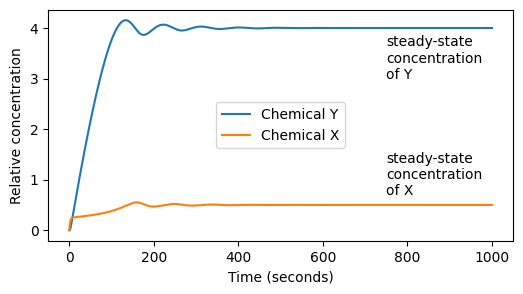

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# set up variables and arrays
n = 1001
k1 = 0.1
k2 = 0.4
k3 = 0.1
k4 = 0.2

X = np.zeros(n)
Y = np.zeros(n)

# initialise variables (not strictly necessary here!)
X[0] = 0
Y[0] = 0

# implement equations
for i in range(n - 1):
    X[i+1] = X[i] + k1 - k2*X[i] + k3*(X[i]**2)*Y[i]
    Y[i+1] = Y[i] + k4*X[i] - k3*(X[i]**2)*Y[i]

# plot on the same figure
plt.figure(figsize=(6,3))
plt.plot(Y, label="Chemical Y")
plt.plot(X, label="Chemical X")
plt.text(750, 3, "steady-state\nconcentration\nof Y ")
plt.text(750, .7, "steady-state\nconcentration\nof X ")
plt.xlabel("Time (seconds)")
plt.ylabel("Relative concentration")
plt.legend(loc="center");

:::{exercise}
:label: functions_extra_primes

In this question you will investigate the [number of prime numbers below a number $n$](https://en.wikipedia.org/wiki/Prime-counting_function) (recall a *prime number* is a number divisible only by 1 and itself).

You will need to use *Boolean variables* which are variables that take the logical values *True* or *False*. For example, the following function `divisible_by_two` returns the Boolean value `True` if its argument is divisible two, and `False` otherwise.

```
def divisible_by_two(n):
    if n % 2 == 0:
        return True
    else:
        return False

k = 5
if divisible_by_two(k):
    print(k, "is even")
else:
    print(k, "is odd")
```

1. Write a function `is_divisible(n, m)` which returns `True` if `n` is divisible by `m`, and otherwise returns `False`.
2. Write a function `is_prime(n)` which returns `False` if `n` is divisible by any integer between `2` and `n-1`, and otherwise returns `True`.
3. Write a function `number_of_primes(n)` which returns the number of prime numbers less than or equal to `n` [NB 1 is *not* a prime number].
4. Draw a graph with `n` on the x-axis and the number of primes less than or equal to `n` on the y-axis.

:::

:::{exercise}

A [solid of revolution](https://en.wikipedia.org/wiki/Solid_of_revolution) is a three-dimensional figure contstructed by rotating a curve about a straight line. We can estimate the volume of a solid of revolution by dividing it into a sequence of stacked discs and summing the volume of each.

A sphere of radius $R$ is formed by rotating the curve $y = \sqrt{R^2 - x^2}$ around the x-axis between $-R$ and $R$.

![a](https://miro.medium.com/max/2400/0*d7QEcno6XhPOiJSt.png)

Use the following steps to estimate the volume of a sphere of radius 1.

1. Write a function `vol_disc(R, x, dx)` which returns the volume of the disc centred at position `x` with thickness `dx`. 
2. Estimate the volume of a sphere of radius 1 by dividing the figure into 10 discs equally spaced between `-1` and `1` [use a value of 3.14159 for $\pi$].
3. Write a function `sphere_vol(R, n)` which returns the estimate of the volume of a sphere of radius `R` calculated by dividing it into `n` discs.
4. The estimate should get more accurate as we increase `n`. We can estimate the accuracy by calculating the difference between `sphere_vol(R, n)` and `sphere_vol(R, n-1)`. For `R = 1`, how large does `n` need to be so that difference between consecutive estimates is less than $10^{-4}$?

:::